In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from pandas_profiling import ProfileReport
import warnings; 
warnings.simplefilter('ignore')
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize': (16,6)})



# Temporarily only using first 1000 rows!!!

In [5]:
import random

filename = 'data/training_set_VU_DM.csv'
p = 0.001  # 1% of the lines
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         filename,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
df['date_time'] = pd.to_datetime(df['date_time'])

In [4]:
# df = pd.read_csv(
#          filename,
#          header=0, 
# #          skiprows=lambda i: i>0 and random.random() > p
# )

In [25]:
df.shape

(4864, 54)

# Dataset statistics

Train or Test?

In [26]:
profile = ProfileReport(df, title="Pandas Profiling Report", minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Some correlations

In [230]:
def print_corr(col1, col2):
    print('{} : {} \t=\t {}'.format(col1, col2, df[col1].corr(df[col2])))

In [232]:
print_corr('price_usd', 'prop_location_score1')

price_usd : prop_location_score1 	=	 0.11704504485213368


In [233]:
print_corr('promotion_flag', 'position')

promotion_flag : position 	=	 -0.1028026649193634


In [289]:
print_corr('srch_adults_count', 'srch_room_count')

srch_adults_count : srch_room_count 	=	 0.4776574924174766


In [292]:
print_corr('srch_booking_window', 'srch_saturday_night_bool')

srch_booking_window : srch_saturday_night_bool 	=	 -0.08020333216998814


In [327]:
print_corr('srch_booking_window', 'orig_destination_distance')

srch_booking_window : orig_destination_distance 	=	 0.33133820395798086


In [330]:
print_corr('srch_booking_window', 'booking_bool')

srch_booking_window : booking_bool 	=	 -0.016711595813207993


## Individual Column stats + plots

In [6]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [339]:
print('Lot of missing values for rate comparisons')
df['comp1_rate'].isna().value_counts()

Lot of missing values for rate comparisons


True     4946
False     133
Name: comp1_rate, dtype: int64

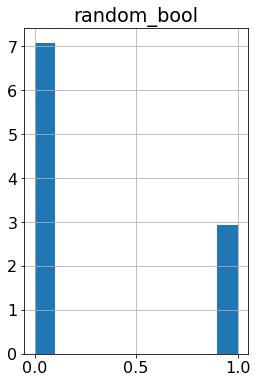

In [336]:
df['random_bool'].hist(density=1, figsize=(4,6))
plt.title('random_bool');

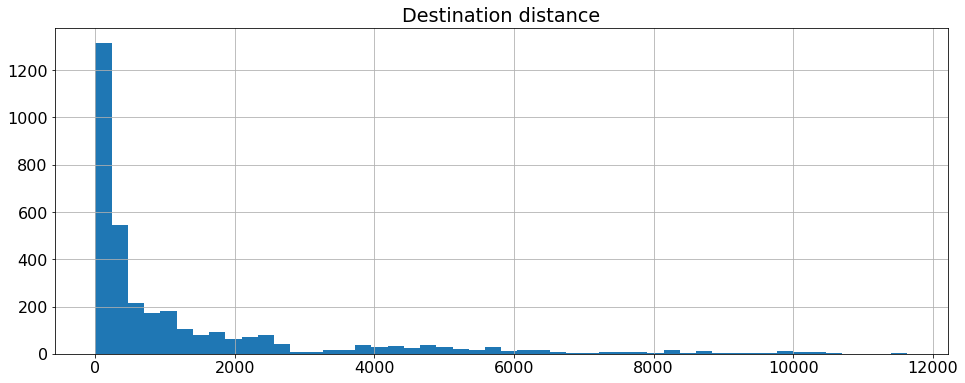

In [326]:
df['orig_destination_distance'].hist(bins=50)
plt.title('Destination distance');

The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative)  A null signifies there are no data (i.e. hotel did not register in any searches)


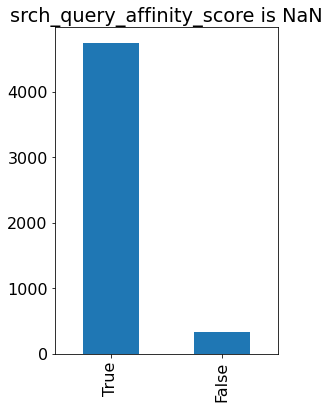

In [313]:
df['srch_query_affinity_score'].isna().value_counts().plot.bar(figsize=(4,6))
plt.title('srch_query_affinity_score is NaN');
print('The log of the probability a hotel will be clicked on in Internet searches (hence the values are negative)  A null signifies there are no data (i.e. hotel did not register in any searches)')

=1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0


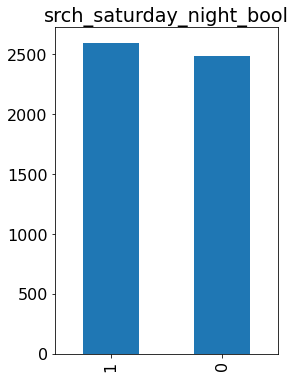

In [309]:
df['srch_saturday_night_bool'].value_counts().plot.bar(figsize=(4,6))
plt.title('srch_saturday_night_bool');
print('=1 if the stay includes a Saturday night, starts from Thursday with a length of stay is less than or equal to 4 nights (i.e. weekend); otherwise 0')

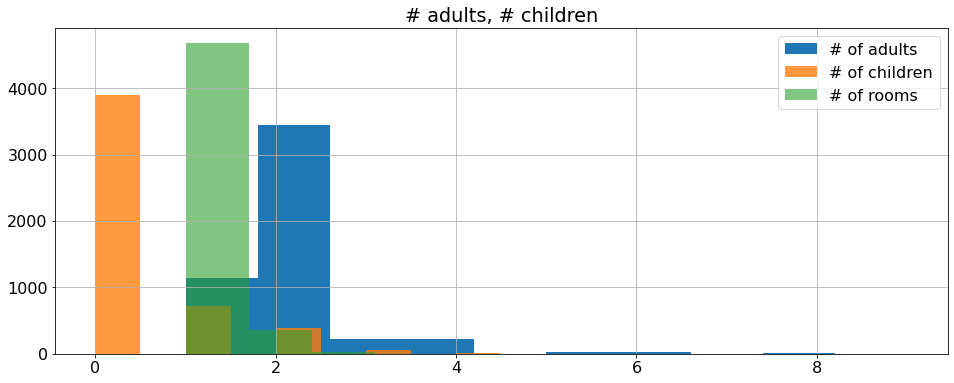

In [290]:
df['srch_adults_count'].hist(label='# of adults')
df['srch_children_count'].hist(alpha=0.8, label='# of children')
df['srch_room_count'].hist(alpha=0.6, label='# of rooms')


plt.legend()
plt.title('# adults, # children');

Many last minute bookings


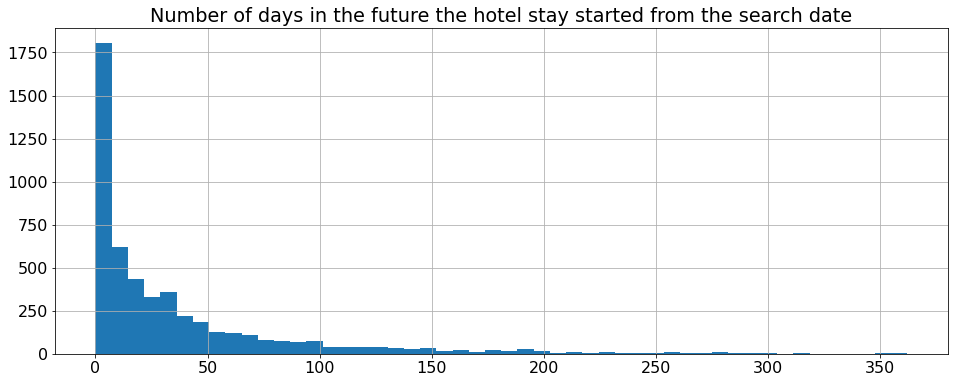

In [274]:
df['srch_booking_window'].hist(bins=50)
plt.title('Number of days in the future the hotel stay started from the search date');
print('Many last minute bookings')

Text(0.5, 1.0, 'Frequency of length of stay')

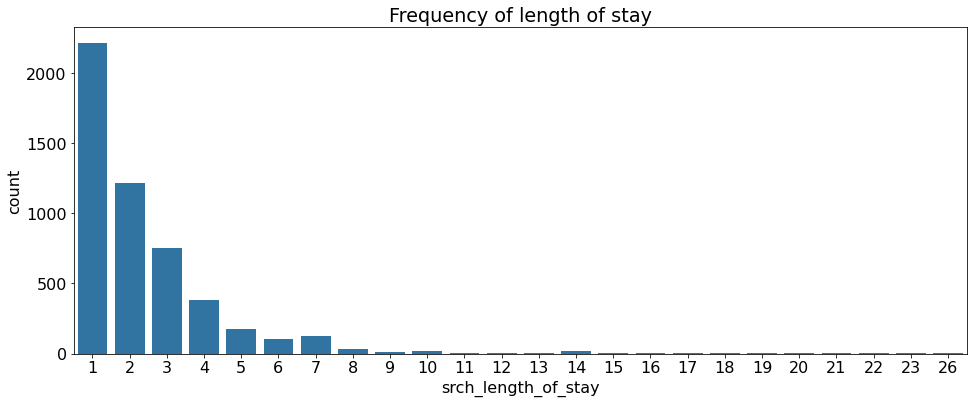

In [262]:
sns.countplot(df['srch_length_of_stay'], color='C0');
plt.title('Frequency of length of stay');

In [252]:
print('# of unique srch_destination_id: ',df['srch_destination_id'].unique().shape)
print('# of unique visitor_location_country_id: ',df['visitor_location_country_id'].unique().shape)
print('# of unique prop_country_id: ',df['prop_country_id'].unique().shape)
print('\nsrch_destination_id probably based on city level')

# of unique srch_destination_id:  (2307,)
# of unique visitor_location_country_id:  (97,)
# of unique prop_country_id:  (103,)

srch_destination_id probably based on city level


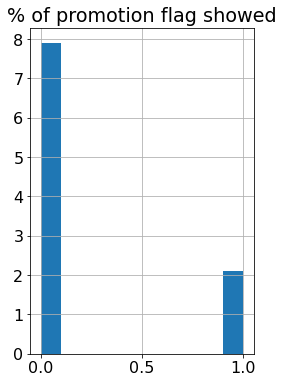

In [220]:
df['promotion_flag'].hist(density=1, figsize=(4,6))
plt.title('% of promotion flag showed');

True     4951
False     128
Name: gross_bookings_usd, dtype: int64

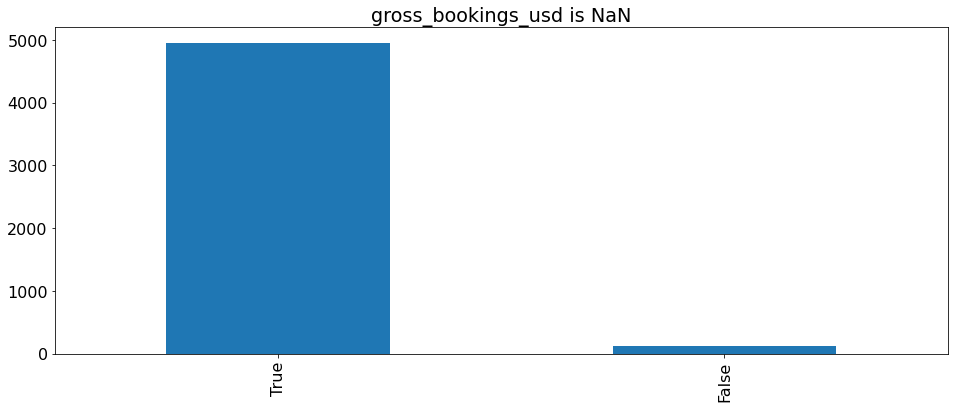

In [200]:
df['gross_bookings_usd'].isna().value_counts().plot.bar()
plt.title('gross_bookings_usd is NaN');
df['gross_bookings_usd'].isna().value_counts()

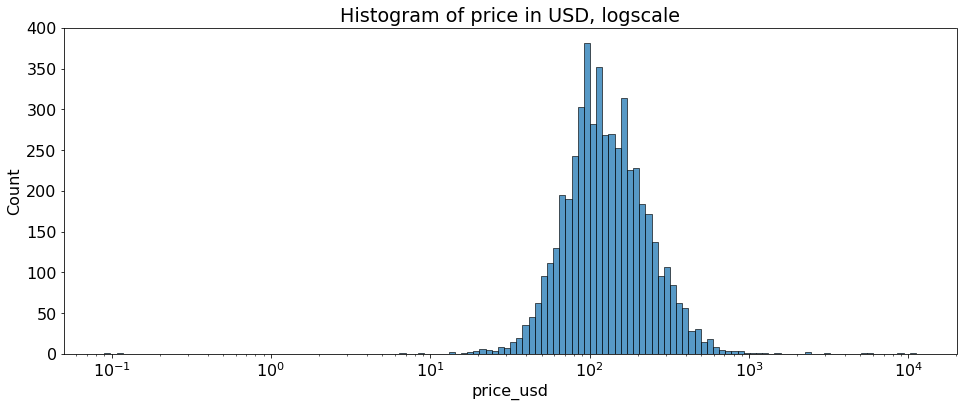

In [172]:
sns.histplot(df['price_usd'], log_scale=True);

plt.title('Histogram of price in USD, logscale');

Some pretty extreme outliers


count     5079.000000
mean       158.328358
std        252.363229
min          0.090000
25%         86.210000
50%        123.000000
75%        185.705000
max      11149.000000
Name: price_usd, dtype: float64

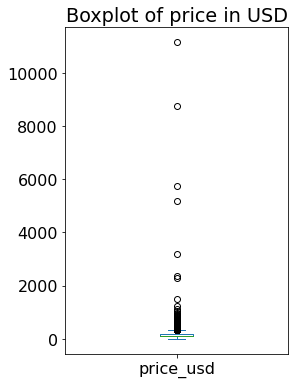

In [159]:
df['price_usd'].plot.box(figsize=(4,6));
print('Some pretty extreme outliers')
plt.title('Boxplot of price in USD');
df['price_usd'].describe()

WTF?


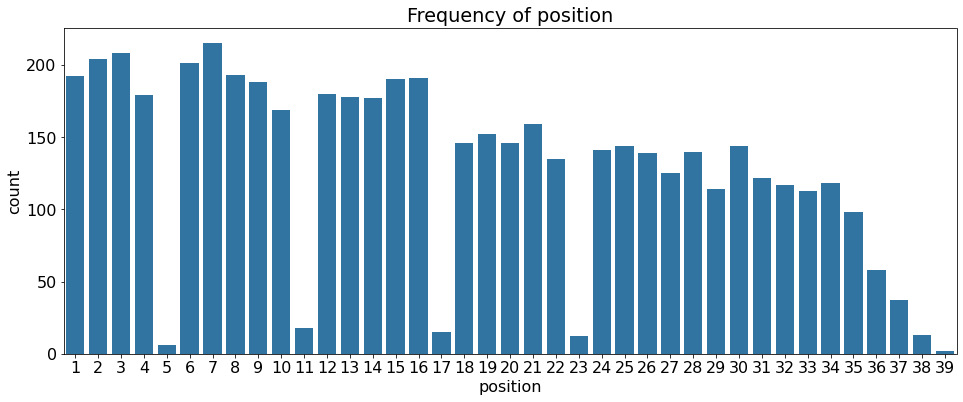

In [139]:
sns.countplot(df['position'], color='C0');
print('WTF?')
plt.title('Frequency of position');

They have different scales 
score1: 0-7
score2: 0-1


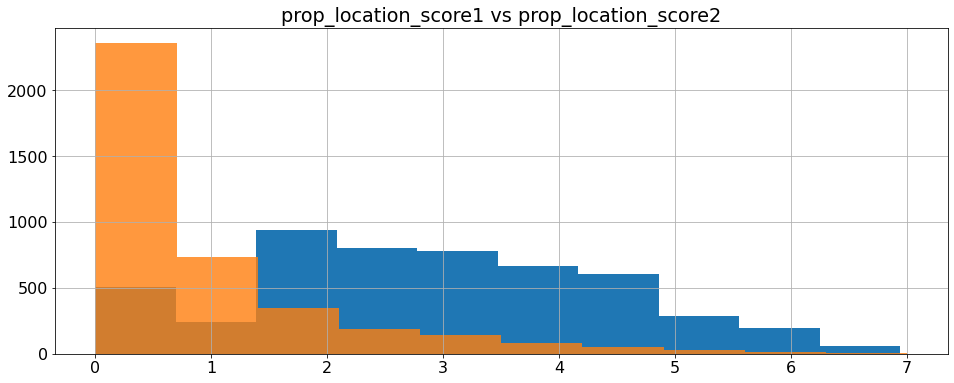

In [104]:
df['prop_location_score1'].hist()
(df['prop_location_score2']*7).hist(alpha=0.8)
plt.title('prop_location_score1 vs prop_location_score2');
print('They have different scales \nscore1: 0-7\nscore2: 0-1')

~60% of hotels belongs to hotel chain


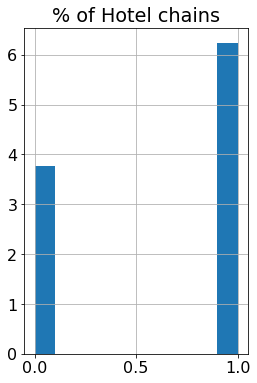

In [153]:
df['prop_brand_bool'].hist(density=1, figsize=(4,6));
print('~60% of hotels belongs to hotel chain')
plt.title('% of Hotel chains');

Star Rating of 1 is super rare
Pretty large positive shift from star rating to review score
How prominent are these features?


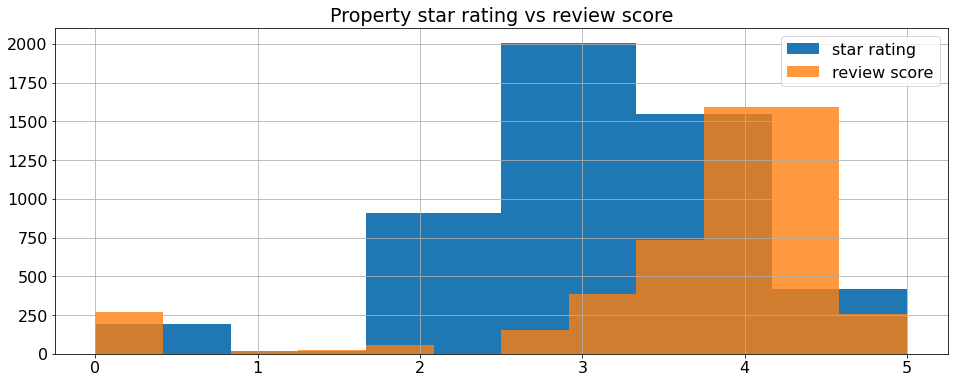

In [95]:
print('Star Rating of 1 is super rare')
print('Pretty large positive shift from star rating to review score')
print('How prominent are these features?')

df['prop_starrating'].hist(bins=6, label='star rating');
df['prop_review_score'].hist(bins=12, label='review score', alpha=0.8);
plt.legend();
plt.title('Property star rating vs review score');

Frequency of USD spent by users with history  AxesSubplot(0.125,0.125;0.775x0.755)


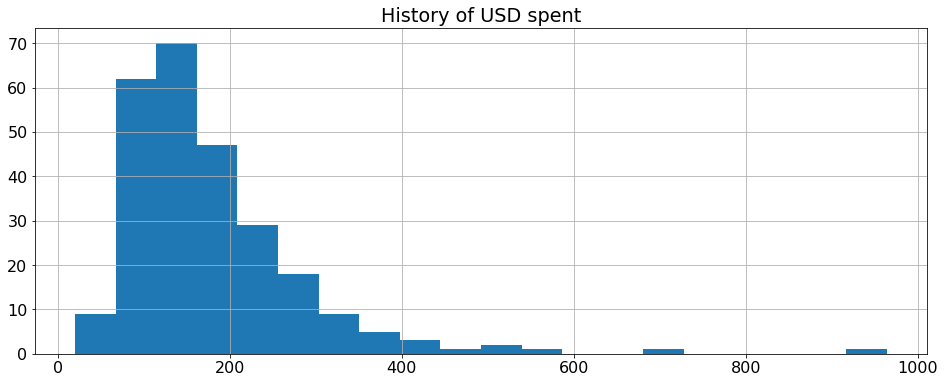

In [94]:
print('Frequency of USD spent by users with history ',
df[~df['visitor_hist_adr_usd'].isna()]['visitor_hist_adr_usd'].hist(bins=20))
plt.title('History of USD spent');

In [206]:
print('History unavailable for {}% of the data'.format(
round(df[df['visitor_hist_starrating'].isna()].shape[0] / df.shape[0] * 100)))

History unavailable for 95% of the data


In [67]:
df['prop_country_id'].unique().shape

(103,)

To which countries do these id refer to??
The IDs appear to be consistent for these columns


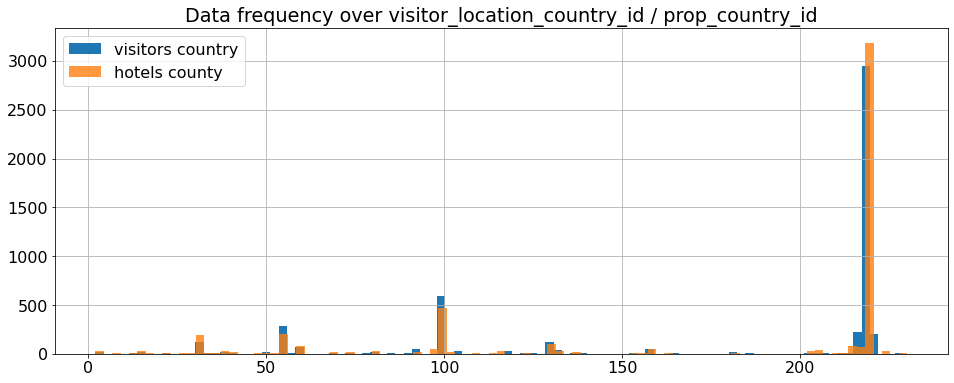

In [78]:
df['visitor_location_country_id'].hist(label='visitors country', bins=97);
plt.title('Data frequency over visitor_location_country_id / prop_country_id');
df['prop_country_id'].hist(label='hotels county', alpha=0.8, bins=97);
plt.legend()
print('To which countries do these id refer to??')
print('The IDs appear to be consistent for these columns')

To which countries do these id refer to??


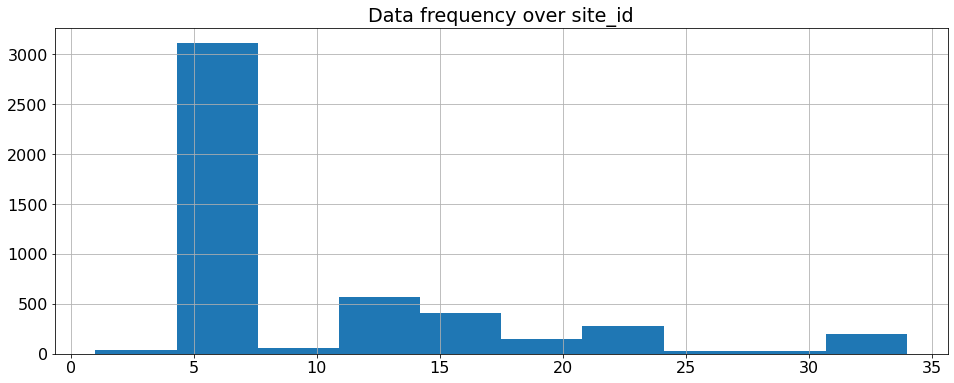

In [190]:
df['site_id'].hist();
plt.title('Data frequency over site_id')
print('To which countries do these id refer to??')

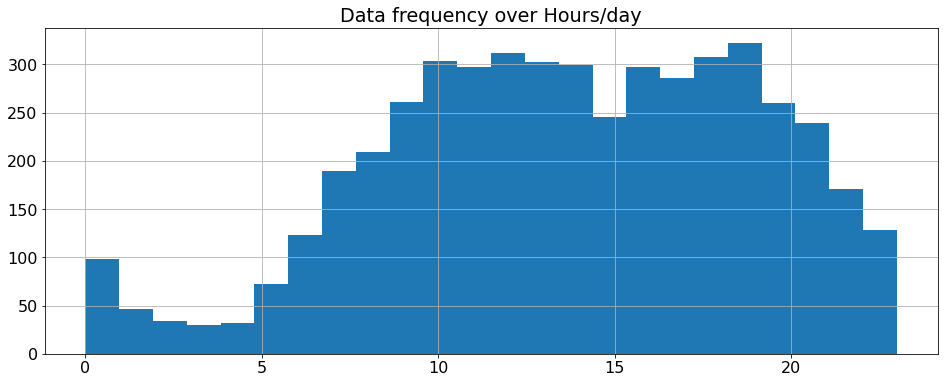

In [189]:
df['date_time'].dt.hour.hist(bins=24);
plt.title('Data frequency over Hours/day');

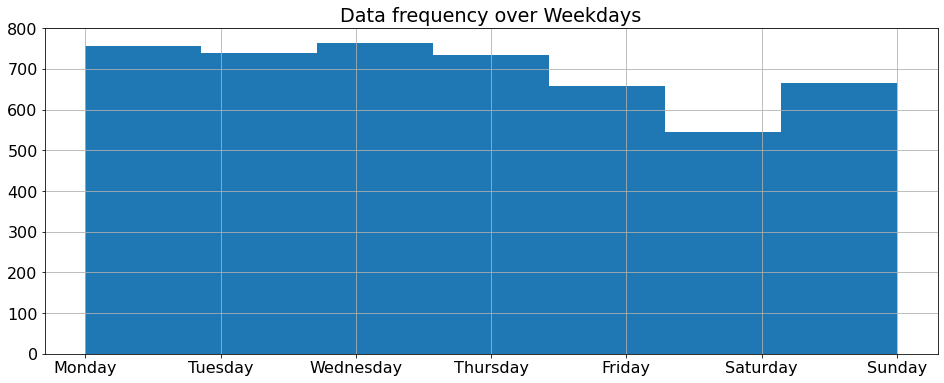

In [188]:
df['date_time'].dt.weekday.hist(bins=7);
plt.xticks(range(0,7), [calendar.day_name[num] for num in range(0,7)]);
plt.title('Data frequency over Weekdays');

Data only for months:  Jan Feb Mar Apr May Jun Nov Dec


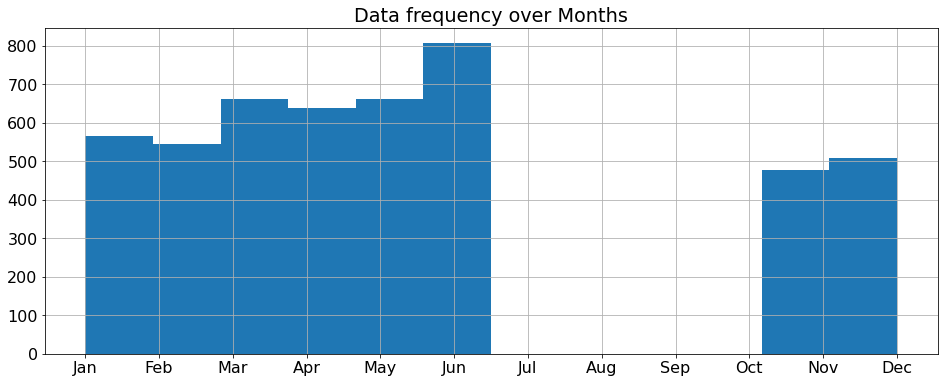

In [186]:
print('Data only for months: ', *df['date_time'].dt.month.sort_values().apply(lambda x: calendar.month_abbr[x]).unique())
df['date_time'].dt.month.hist(bins=12);
plt.xticks(range(1,13), [calendar.month_abbr[num] for num in range(1,13)]);
plt.title('Data frequency over Months');


Number of samples during time period fairly constant


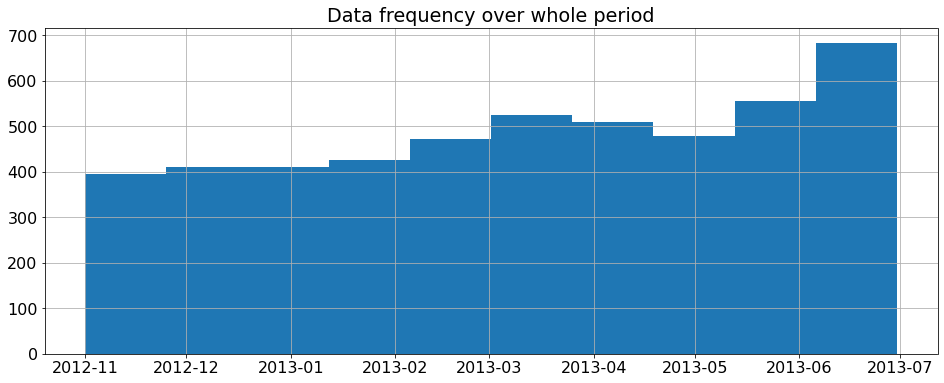

In [187]:
df['date_time'].dt.floor('D').hist();
print('Number of samples during time period fairly constant')
plt.title('Data frequency over whole period');



In [42]:
print('Data ranges from {} until {}'.format(
df['date_time'].min(), df['date_time'].max()))

Data ranges from 2012-11-01 06:14:59 until 2013-06-30 23:57:52


In [16]:
# num of individual searches
print('Number of individual searches: ', df['srch_id'].unique().shape[0])

Number of individual searches:  199795


## Lot of missing values in certain columns

Text(0, 0.5, 'Missing values %')

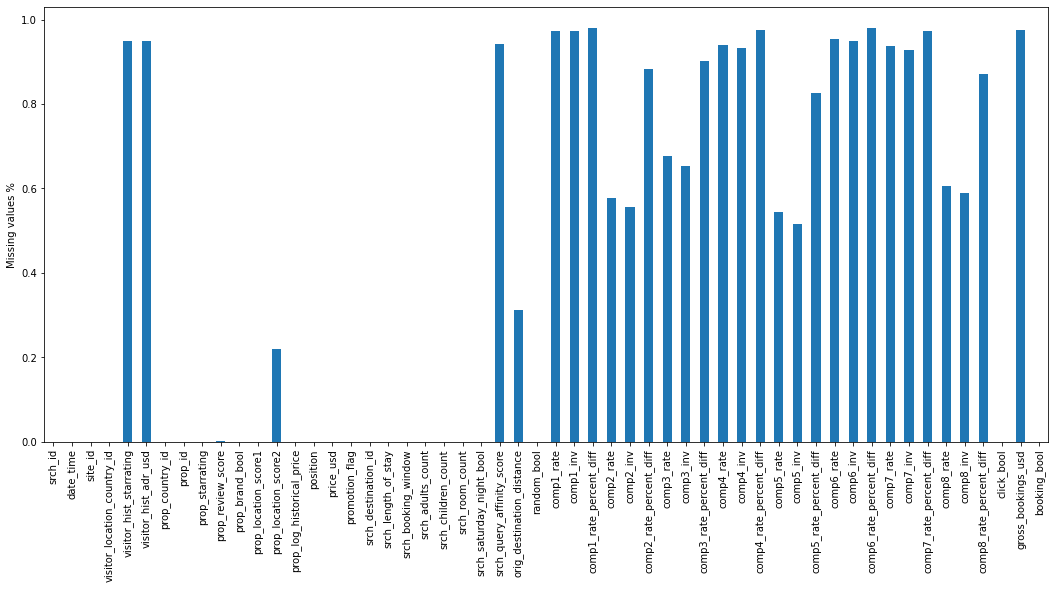

In [48]:
(df.isna().sum() / df.shape[0]).plot.bar(figsize=(18,8))
plt.ylabel('Missing values %')


## Correlations

These columns seem to be correlated with some other features:\
visitor_hist_starring\
visitor_hist_adr_usd\
srch_query_affinity_score\
gross_booking_usd\
\
Only click_bool seems to be correlated with the target (booking_bool)

<AxesSubplot:>

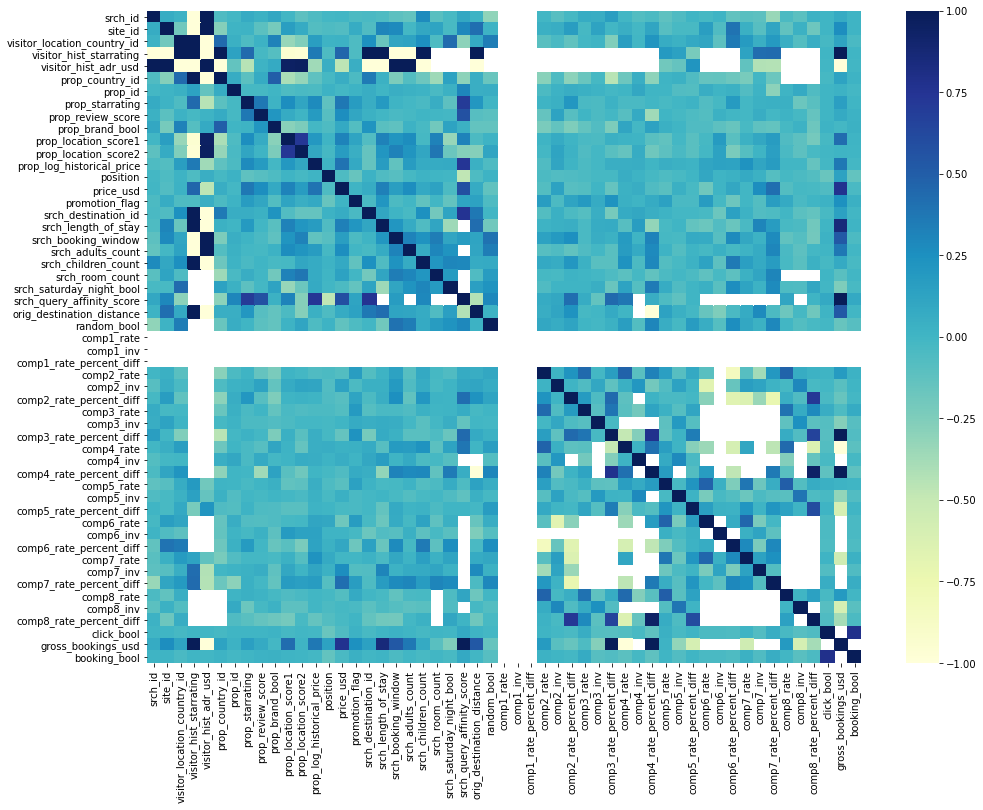

In [34]:
corr = df.corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")

## Highly unbalanced target

might have to adjust training data\
or create a weighted loss function 

<AxesSubplot:>

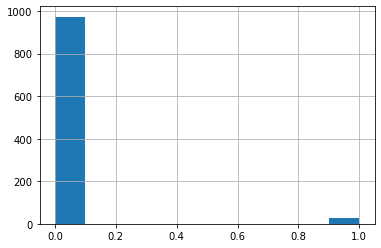

In [43]:
df['booking_bool'].hist()

## File shapes

In [39]:
df.shape

(4958347, 54)

In [41]:
pd.read_csv('data/test_set_VU_DM.csv').shape

(4959183, 50)

In [42]:
pd.read_csv('data/submission_sample.csv').shape

(4959183, 2)

1. we predict on the test file
2. wtf train is the same shape as test

## How many predictions

In [18]:
%matplotlib inline
df.groupby('srch_id')[['prop_id', 'position']].count()#.hist()

,prop_id,position
srch_id,,
1,28,28
4,32,32
6,5,5
8,21,21
11,33,33
...,...,...
332777,32,32
332781,15,15
332782,24,24


at least 5 we have. we have proposed hotels and they are ordered 

In [24]:
df.groupby('srch_id')['position'].apply(list).apply(sorted)#.hist()

srch_id
1         [1, 2, 3, 4, 6, 7, 8, 10, 12, 13, 15, 18, 19, ...
4         [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
6                                           [1, 2, 3, 4, 6]
8         [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
11        [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
                                ...                        
332777    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332781    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332782    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332784    [1, 2, 3, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...
332785                                   [1, 2, 3, 4, 6, 7]
Name: position, Length: 199795, dtype: object

## Time

In [25]:
df['date_time'].agg([min, max])

min    2012-11-01 00:08:29
max    2013-06-30 23:58:24
Name: date_time, dtype: object

In [26]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'].agg([min, max])

min   2012-11-01 00:08:29
max   2013-06-30 23:58:24
Name: date_time, dtype: datetime64[ns]

In [27]:
time_df = df.drop_duplicates(['srch_id', 'date_time'])['date_time']
time_df.head()

0    2013-04-04 08:32:15
28   2012-12-31 08:59:22
60   2013-06-05 12:27:51
65   2013-03-20 17:50:44
86   2013-02-25 08:39:33
Name: date_time, dtype: datetime64[ns]

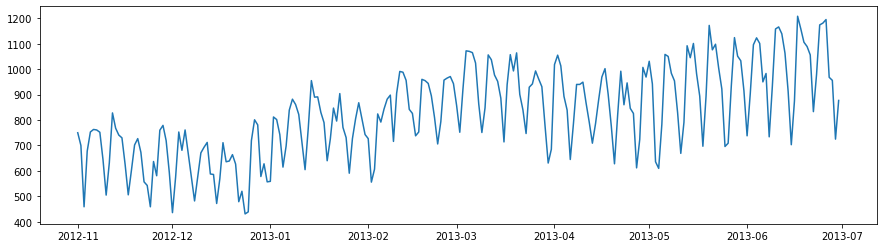

In [38]:
plt.figure(figsize=(15, 4));
time_df.dt.date.value_counts().plot();

test is in the same time period as train. maybe time-series CV is not needed?

# Plots

# Remarks about data distributions